In [2]:
import pandas as pd
import numpy as np
import missingno as mso
# 数据导入+数据特征行显示
Train_data = pd.read_csv(
    'E:\编程资料\比赛\数据挖掘\二手汽车\\used_car_train_20200313\\used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(
    'E:\编程资料\比赛\数据挖掘\二手汽车\\used_car_testA_20200313\\used_car_testA_20200313.csv', sep=' ')

print('Train_data shape:', Train_data.shape)
print('Test_data:', Test_data.shape)
print(Test_data.columns)
print(Train_data.head(100), Test_data.head(100))
# 数据说明：
# name	汽车交易名称，已脱敏
'''regDate	汽车注册日期，例如20160101，2016年01月01日
model	车型编码，已脱敏
brand	汽车品牌，已脱敏
bodyType	车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：
5，商务车：6，搅拌车：7
fuelType	燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6
gearbox	变速箱：手动：0，自动：1
power	发动机功率：范围 [ 0, 600 ]
kilometer	汽车已行驶公里，单位万km
notRepairedDamage	汽车有尚未修复的损坏：是：0，否：1
regionCode	地区编码，已脱敏
seller	销售方：个体：0，非个体：1
offerType	报价类型：提供：0，请求：1
creatDate	汽车上线时间，即开始售卖时间
price	二手车交易价格（预测目标）
v系列特征	匿名特征，包含v0-14在内15个匿名特征'''

Train_data shape: (150000, 31)
Test_data: (50000, 30)
Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')
    SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0        0     736  20040402   30.0      6       1.0       0.0      0.0   
1        1    2262  20030301   40.0      1       2.0       0.0      0.0   
2        2   14874  20040403  115.0     15       1.0       0.0      0.0   
3        3   71865  19960908  109.0     10       0.0       0.0      1.0   
4        4  111080  20120103  110.0      5       1.0       0.0      0.0   
..     ...     ...       ...    ...    ...       ...       ...      ...   
95      95  110755  20051012    5.0      5       1.0       0.0      0.0   
96 

'regDate\t汽车注册日期，例如20160101，2016年01月01日\nmodel\t车型编码，已脱敏\nbrand\t汽车品牌，已脱敏\nbodyType\t车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：\n5，商务车：6，搅拌车：7\nfuelType\t燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6\ngearbox\t变速箱：手动：0，自动：1\npower\t发动机功率：范围 [ 0, 600 ]\nkilometer\t汽车已行驶公里，单位万km\nnotRepairedDamage\t汽车有尚未修复的损坏：是：0，否：1\nregionCode\t地区编码，已脱敏\nseller\t销售方：个体：0，非个体：1\nofferType\t报价类型：提供：0，请求：1\ncreatDate\t汽车上线时间，即开始售卖时间\nprice\t二手车交易价格（预测目标）\nv系列特征\t匿名特征，包含v0-14在内15个匿名特征'

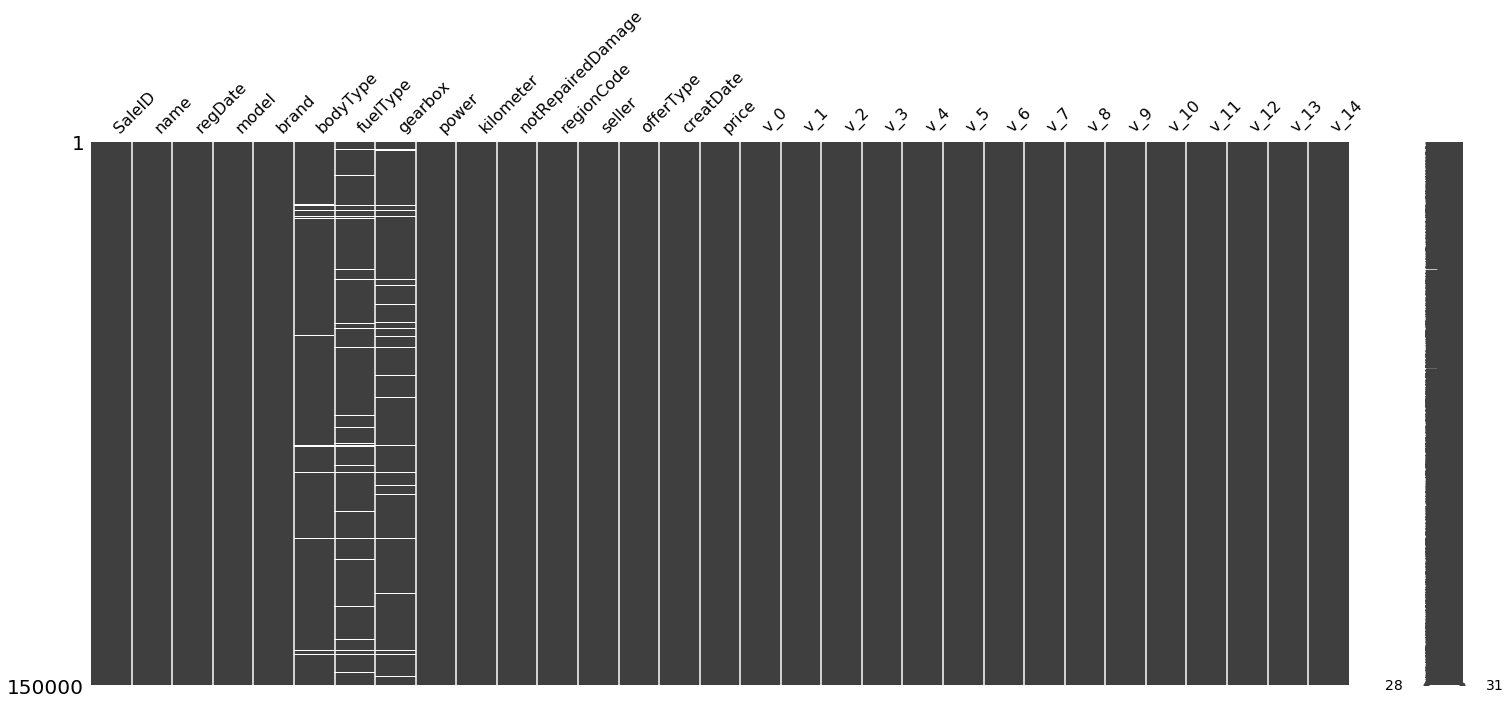

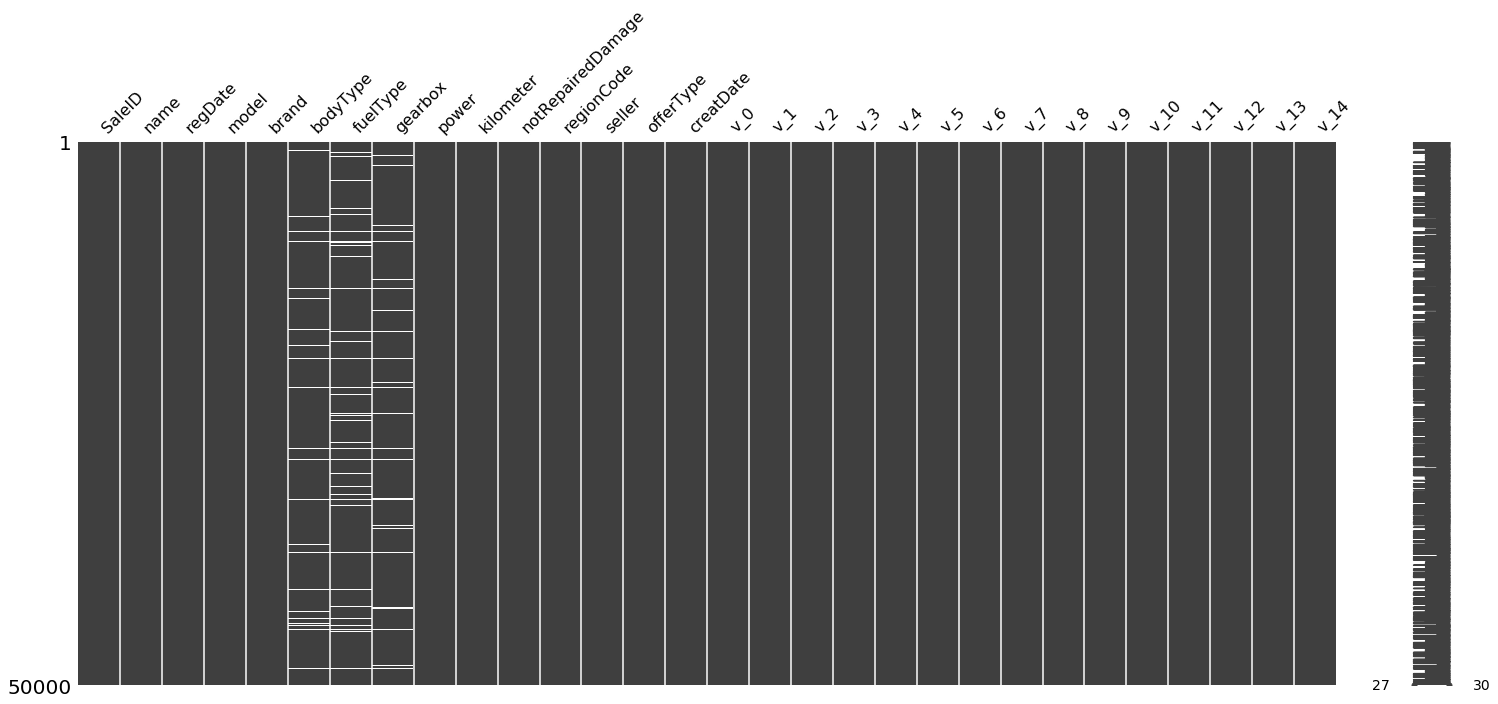

In [3]:
# 数据缺失描述
mso.matrix(Train_data)
mso.matrix(Test_data)

In [4]:
#数据总体描述和具体特征缺失情况
print(Train_data.describe())
print(Train_data.isnull().sum())

              SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       

In [5]:
print(Test_data.describe())
print(Test_data.isnull().sum())

              SaleID           name       regDate         model         brand  \
count   50000.000000   50000.000000  5.000000e+04  50000.000000  50000.000000   
mean   174999.500000   68542.223280  2.003393e+07     46.844520      8.056240   
std     14433.901067   61052.808133  5.368870e+04     49.469548      7.819477   
min    150000.000000       0.000000  1.991000e+07      0.000000      0.000000   
25%    162499.750000   11203.500000  1.999091e+07     10.000000      1.000000   
50%    174999.500000   52248.500000  2.003091e+07     29.000000      6.000000   
75%    187499.250000  118856.500000  2.007110e+07     65.000000     13.000000   
max    199999.000000  196805.000000  2.015121e+07    246.000000     39.000000   

           bodyType      fuelType       gearbox         power     kilometer  \
count  48587.000000  47107.000000  48090.000000  50000.000000  50000.000000   
mean       1.782185      0.373405      0.224350    119.883620     12.595580   
std        1.760736      0.546442

In [6]:
#异常值检测
print(Test_data.info())
print(Train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [7]:
#因为notrepaireddamage为object形，所以探查
print(Train_data['notRepairedDamage'].value_counts())
print(Test_data['notRepairedDamage'].value_counts())
#从数据描述上看，应该是0-1判断，可是处在-，即-也应算作缺失值
Train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
Test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
print(Train_data['notRepairedDamage'].value_counts())
print(Test_data['notRepairedDamage'].value_counts())

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64
0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64
0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64
0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64


In [8]:
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st #引入科学计算包，统计类
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [9]:
#从手册中看到，需要删除一些特征分布过于两极化的列
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64


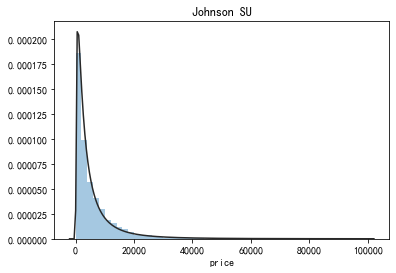

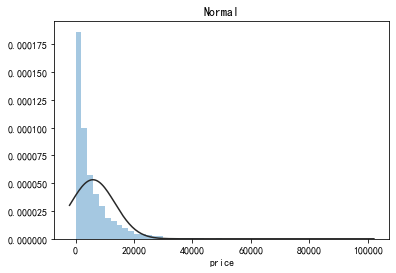

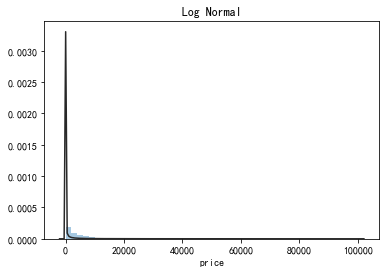

In [10]:
#了解预测值的分布,根据不同的分布进行变换
y=Train_data['price']
print(Train_data['price'].value_counts())
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y,kde=False,fit=st.lognorm)
#约翰逊分布最好

skewness for prediction:3.346487:
kurtosis for prediction:18.995183


(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

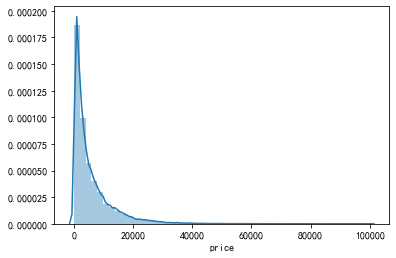

In [11]:
#查看skewness and kurtosis（偏度和峰度）
#这个之前并没有做过，首先是针对预测值，之后是其他特征
#偏度是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。定义上偏度是样本的三阶标准化矩。
#峰度（peakedness；kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。
sns.distplot(y)
print('skewness for prediction:%f:'%y.skew())
print('kurtosis for prediction:%f'%y.kurt())
Train_data.skew(),Train_data.kurt()

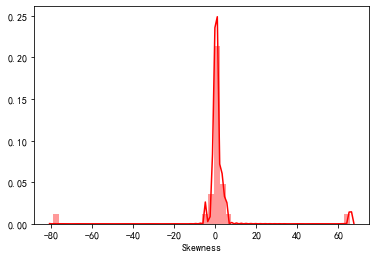

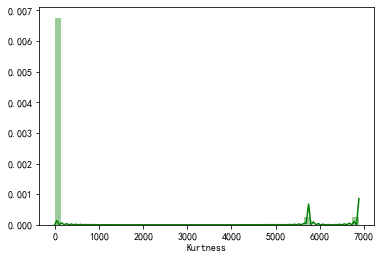

In [12]:
plt.figure(1)
sns.distplot(Train_data.skew(),color='red',axlabel='Skewness')
plt.figure(2)
sns.distplot(Train_data.kurt(),color='green',axlabel='Kurtness')

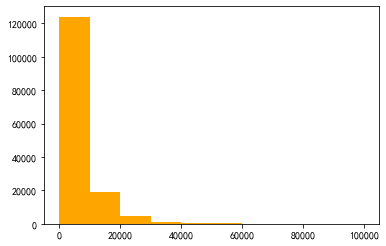

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(array([64523., 30690., 16797., 11896.,  6752.,  5667.,  3729.,  2779.,
         1549.,  1496.]),
 array([1.10000e+01, 2.50990e+03, 5.00880e+03, 7.50770e+03, 1.00066e+04,
        1.25055e+04, 1.50044e+04, 1.75033e+04, 2.00022e+04, 2.25011e+04,
        2.50000e+04]),
 <a list of 10 Patch objects>)

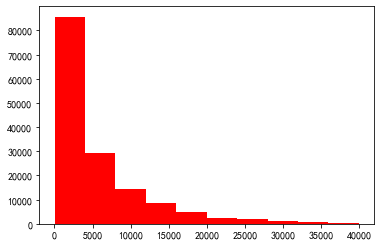

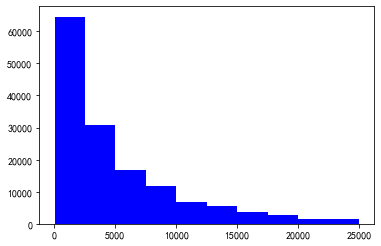

In [13]:
#查看预测值的具体频数
plt.figure(1)
plt.hist(y,orientation='vertical',histtype='bar',color='orange')
plt.show()
#考虑去掉40000以上的数值
Train_data_1=Train_data.copy()
Train_data_1['price'][Train_data_1['price']>40000]=None#注意，这是两个[]
Train_data_1.dropna()
plt.figure(2)
plt.hist(Train_data_1['price'],orientation='vertical',histtype='bar',color='red')
Train_data_2=Train_data.copy()
#去掉25000以上的值
Train_data_2['price'][Train_data_2['price']>25000]=None
Train_data_2.dropna()
plt.figure(3)
plt.hist(Train_data_2['price'],orientation='vertical',histtype='bar',color='blue')

In [14]:
#特征分类，之前没有做过类似的
#首先分离预测值
Y_train=Train_data['price']
Y_train1=Train_data_1['price']
Y_train2=Train_data_2['price']

In [15]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
                    'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 
                        'gearbox', 'notRepairedDamage', 'regionCode',]


In [15]:
#特征分布nunique-分类特征
#nunique可直接统计dataframe中每列的不同值的个数,也可用于series,但不能用于list.返回的是不同值的个数.
for cat_fea in categorical_features:
    print('训练集的'+cat_fea+'的特征分布如下：')
    print('训练集的{}特征有个{}不同的值'.format(cat_fea,Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

训练集的name的特征分布如下：
训练集的name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
训练集的model的特征分布如下：
训练集的model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
训练集的brand的特征分布如下：
训练集的brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: 

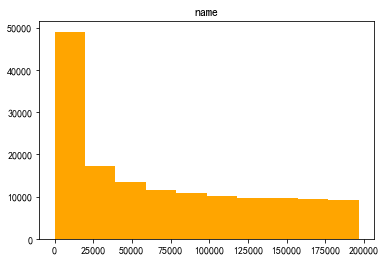

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


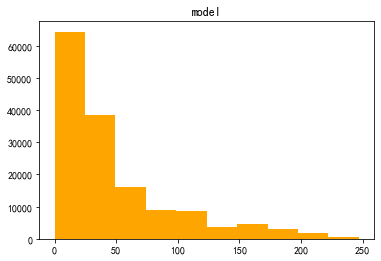

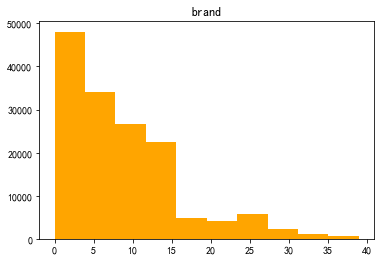

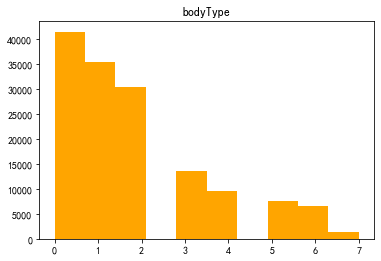

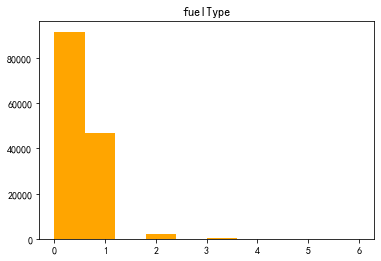

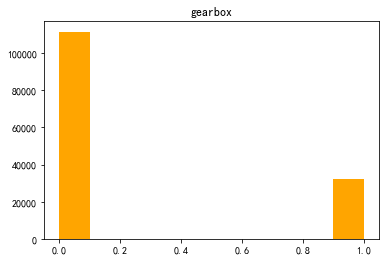

TypeError: nan is not a string

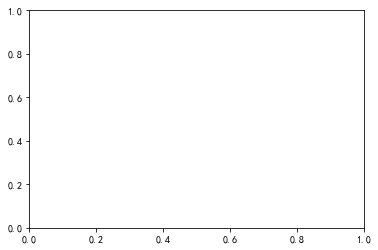

In [18]:
figsize = (8, 8)

for cat_col in categorical_features:
    plt.hist(Train_data[cat_col], orientation='vertical', histtype='bar', color='orange')
    plt.title(cat_col)
    plt.show()

In [16]:
#unique统计list中的不同值时，返回的是array.它有三个参数，可分别统计不同的量，返回的都是array.
for cat_fea in categorical_features:
    print('测试集的'+cat_fea+'的特征分布如下：')
    print('测试集的{}特征有个{}不同的值'.format(cat_fea,Train_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

测试集的name的特征分布如下：
测试集的name特征有个99662不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
测试集的model的特征分布如下：
测试集的model特征有个248不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
测试集的brand的特征分布如下：
测试集的brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
测试集的bodyType的

In [17]:
#数字特征
numeric_features.append('price')
print(numeric_features)

['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'price']


In [18]:
#数据相关性分析
price_numeric=Train_data[numeric_features]
correlation=price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



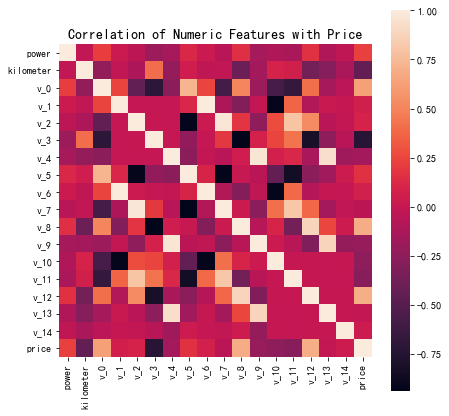

In [19]:
#绘制相关系数热力图
f,ax=plt.subplots(figsize=(7,7))
plt.title('Correlation of Numeric Features with Price',y=1,size=14)
sns.heatmap(correlation,square=True,vmax=1.0)

In [20]:
#查看几个特征的偏度与峰值
for col in numeric_features:
    print('{:15}'.format(col),#{:15}为字符宽度 是显示的宽度
          'Skewness:{:05.2f}'.format(Train_data[col].skew()),
          ' '
          'Kurtosis:{:06.2f}'.format(Train_data[col].kurt()))

power           Skewness:65.86  Kurtosis:5733.45
kilometer       Skewness:-1.53  Kurtosis:001.14
v_0             Skewness:-1.32  Kurtosis:003.99
v_1             Skewness:00.36  Kurtosis:-01.75
v_2             Skewness:04.84  Kurtosis:023.86
v_3             Skewness:00.11  Kurtosis:-00.42
v_4             Skewness:00.37  Kurtosis:-00.20
v_5             Skewness:-4.74  Kurtosis:022.93
v_6             Skewness:00.37  Kurtosis:-01.74
v_7             Skewness:05.13  Kurtosis:025.85
v_8             Skewness:00.20  Kurtosis:-00.64
v_9             Skewness:00.42  Kurtosis:-00.32
v_10            Skewness:00.03  Kurtosis:-00.58
v_11            Skewness:03.03  Kurtosis:012.57
v_12            Skewness:00.37  Kurtosis:000.27
v_13            Skewness:00.27  Kurtosis:-00.44
v_14            Skewness:-1.19  Kurtosis:002.39
price           Skewness:03.35  Kurtosis:019.00


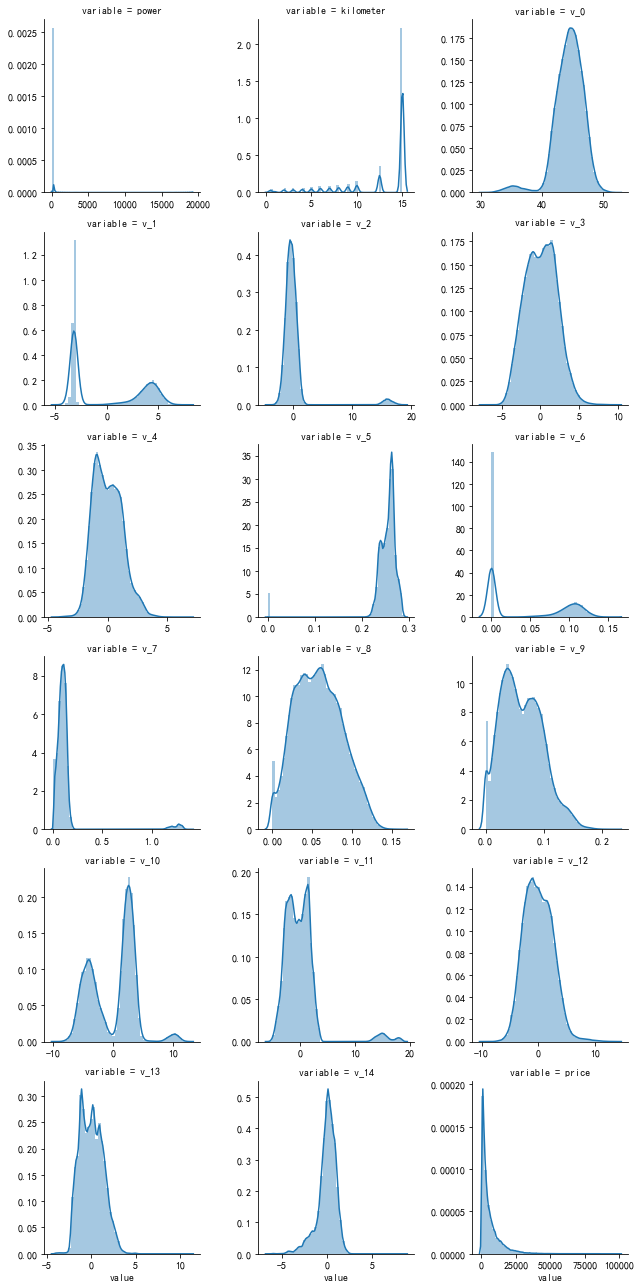

In [21]:
#***数字特征分布可视化！！！
f=pd.melt(Train_data,value_vars=numeric_features)
g=sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')
#faceGrid 多图网络结构化讲解
    #https://blog.csdn.net/qixizhuang/article/details/85168616?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


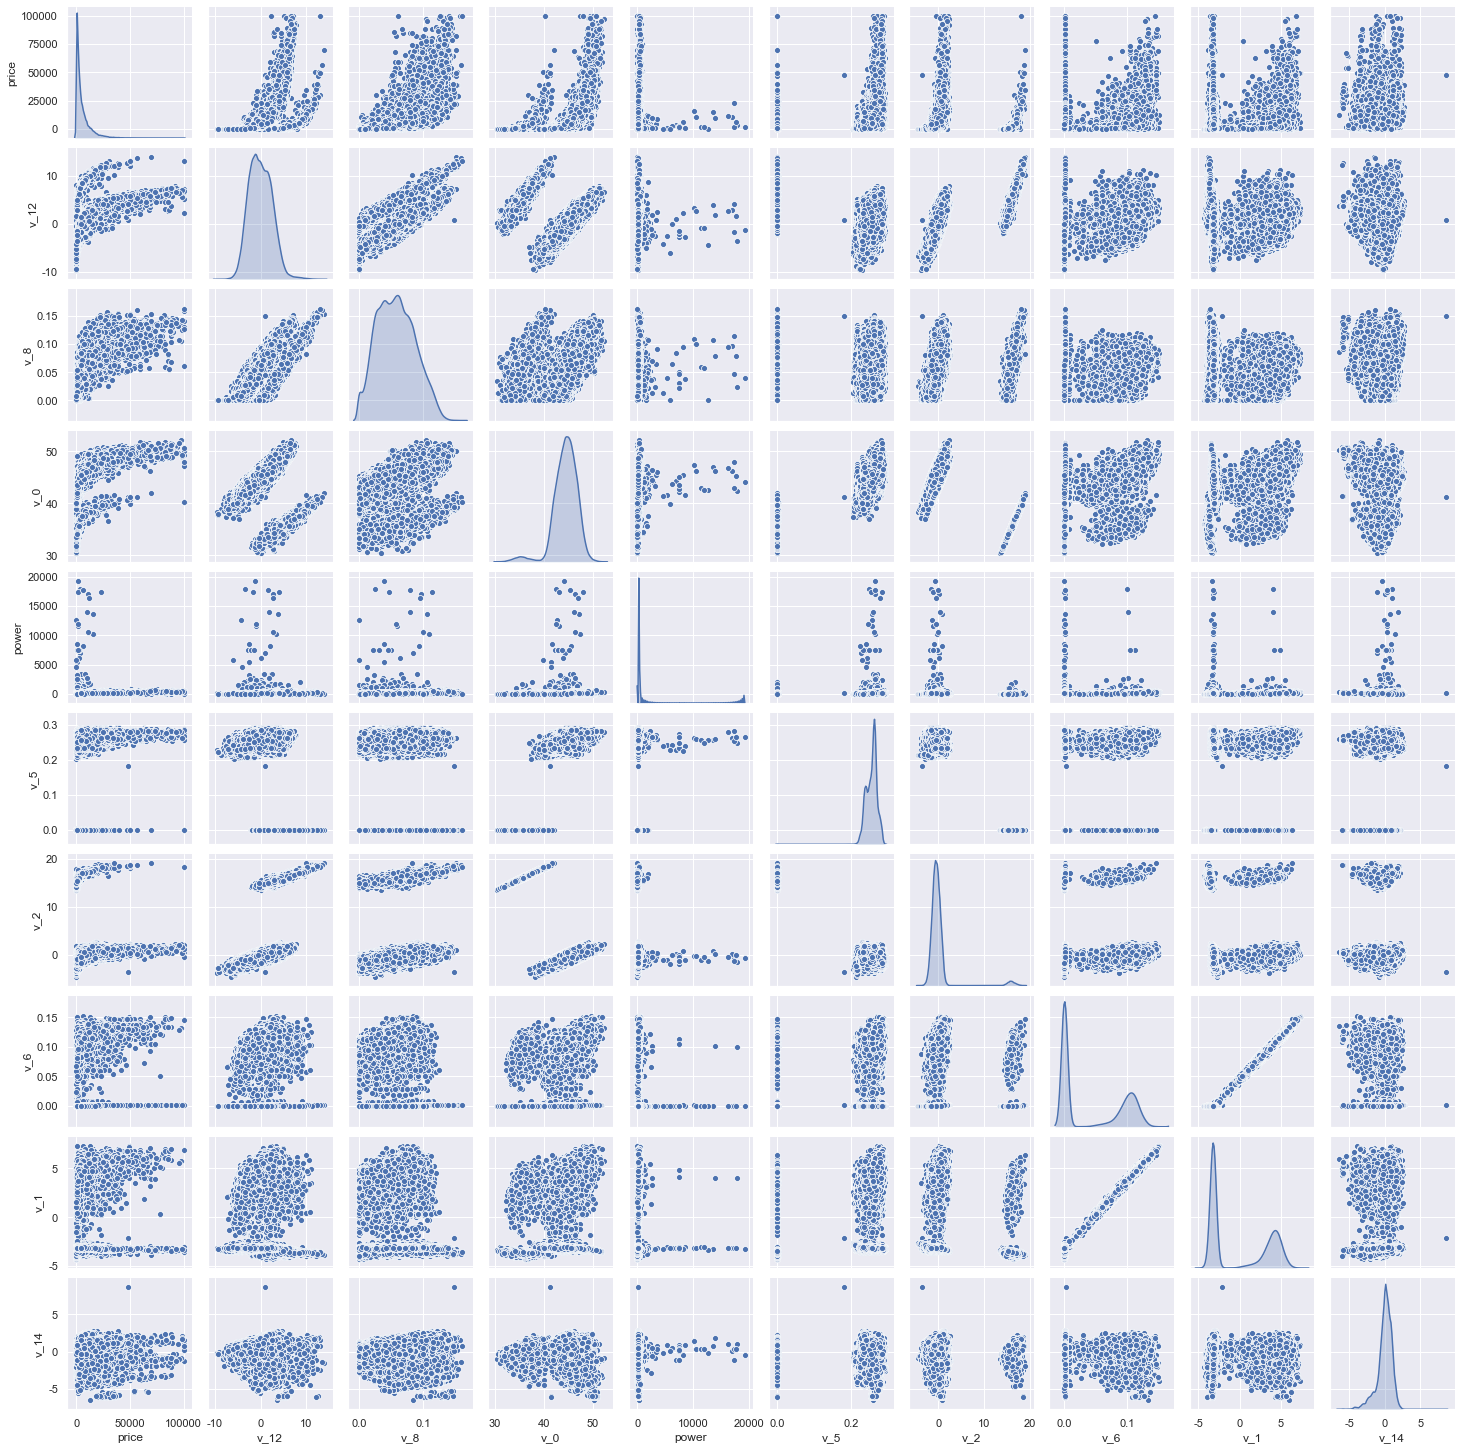

In [22]:
#数字特征相互之间的关系可视化
sns.set()
columens=['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columens],size=2,kind='scatter',diag_kind='kde')
plt.show()

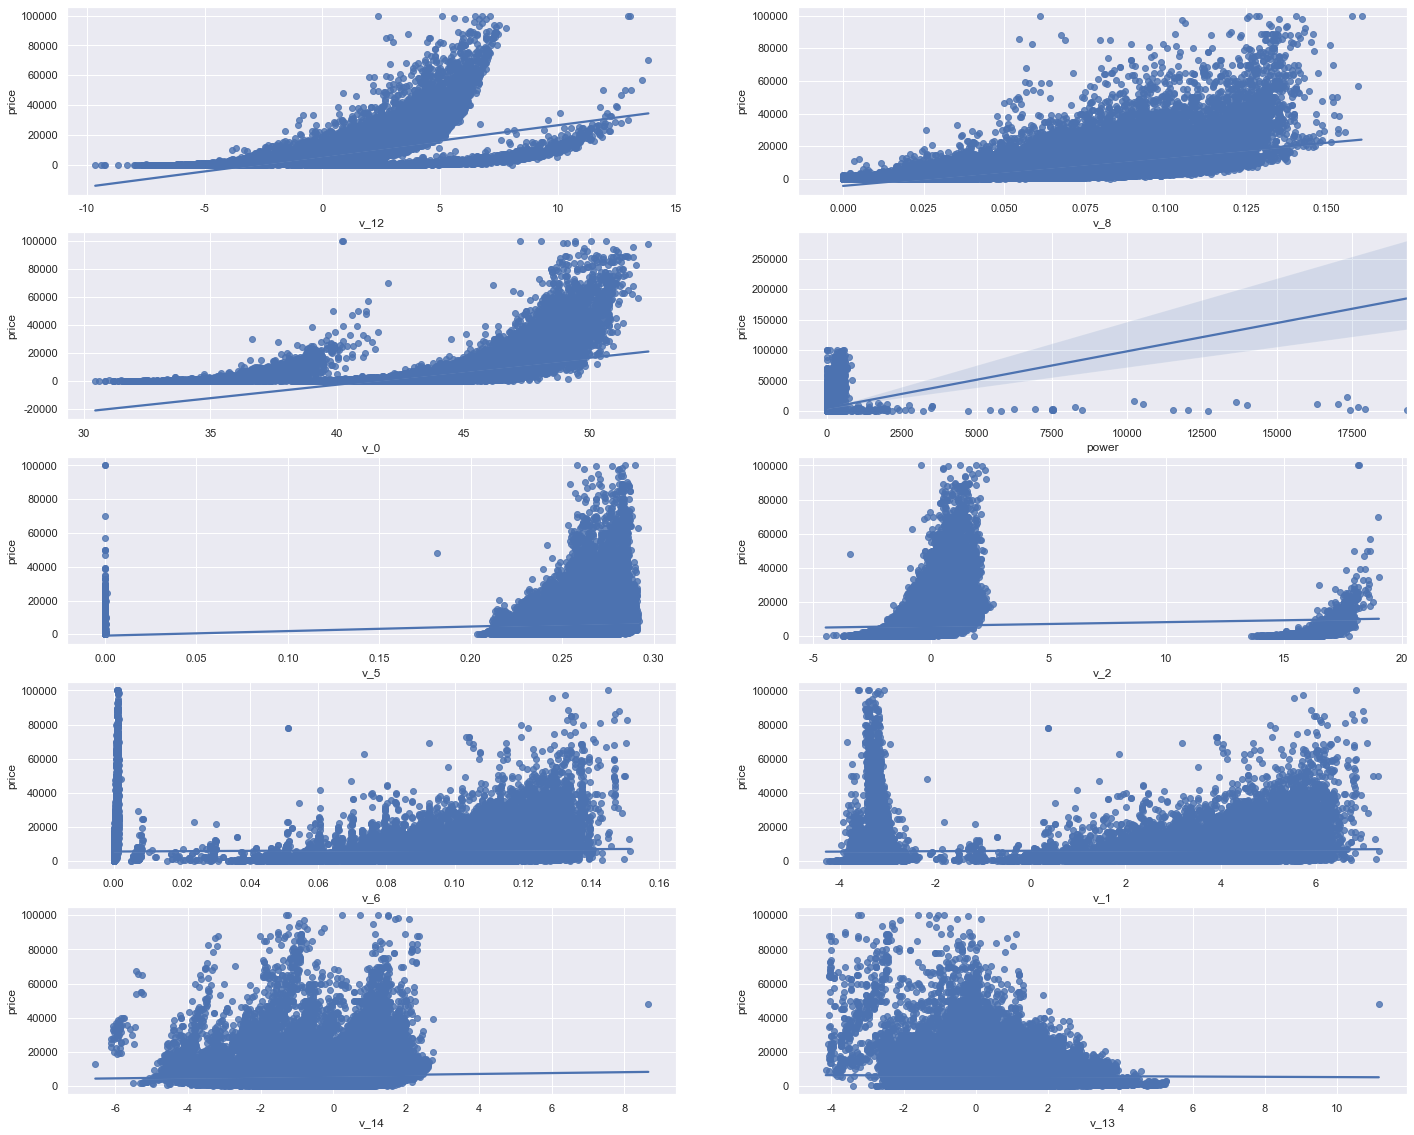

In [23]:
#多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


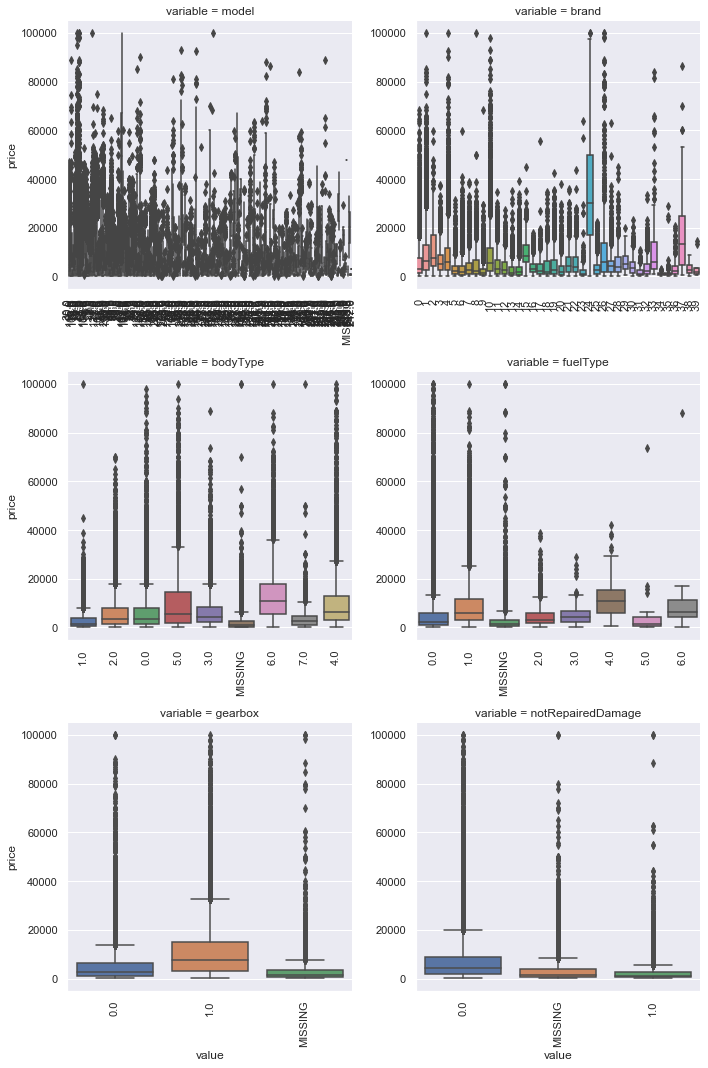

In [24]:
#类别特征箱型图可视化-这一段需要好好理解
#Name与regioncODEde的数值太多，因此不刻画箱型图
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 
                        'gearbox', 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
#any() 函数用于判断给定的可迭代参数 iterable 是否全部为 False，则返回 False，如果有一个为 True，则返回 True
        Train_data[c]=Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c]=Train_data[c].fillna('MISSING')
#**kwargs	允许你将不定长度的键值对作为参数传递给一个函数。如果你想要在一个函数里处理带名字的参数，你应该使用**kwargs
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

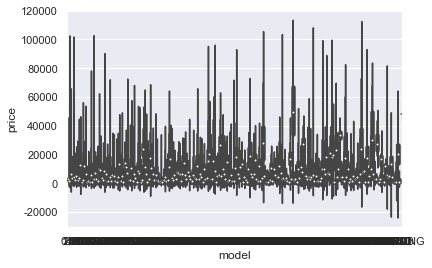

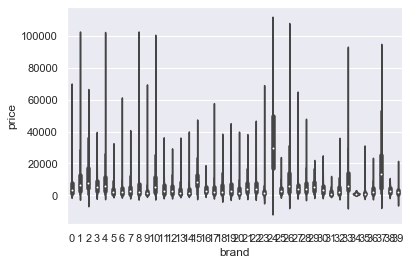

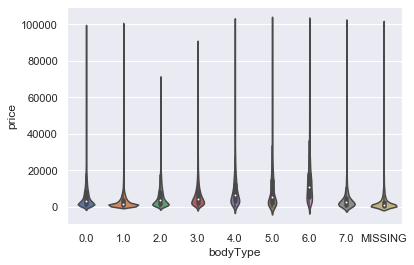

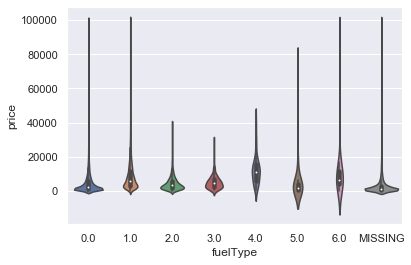

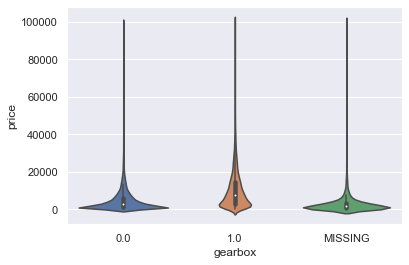

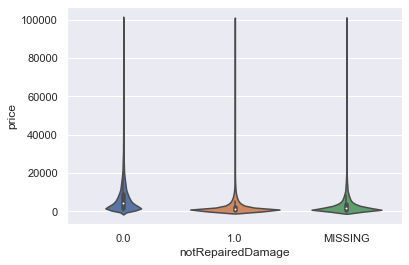

<Figure size 432x288 with 0 Axes>

In [33]:
#类别特征小提琴图
catg_list=categorical_features
target='price'
for catg in catg_list:
    sns.violinplot(x=catg,y=target,data=Train_data)
    plt.savefig("保存图片1.png", transparent=False, dpi=300)
    plt.show()
    plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


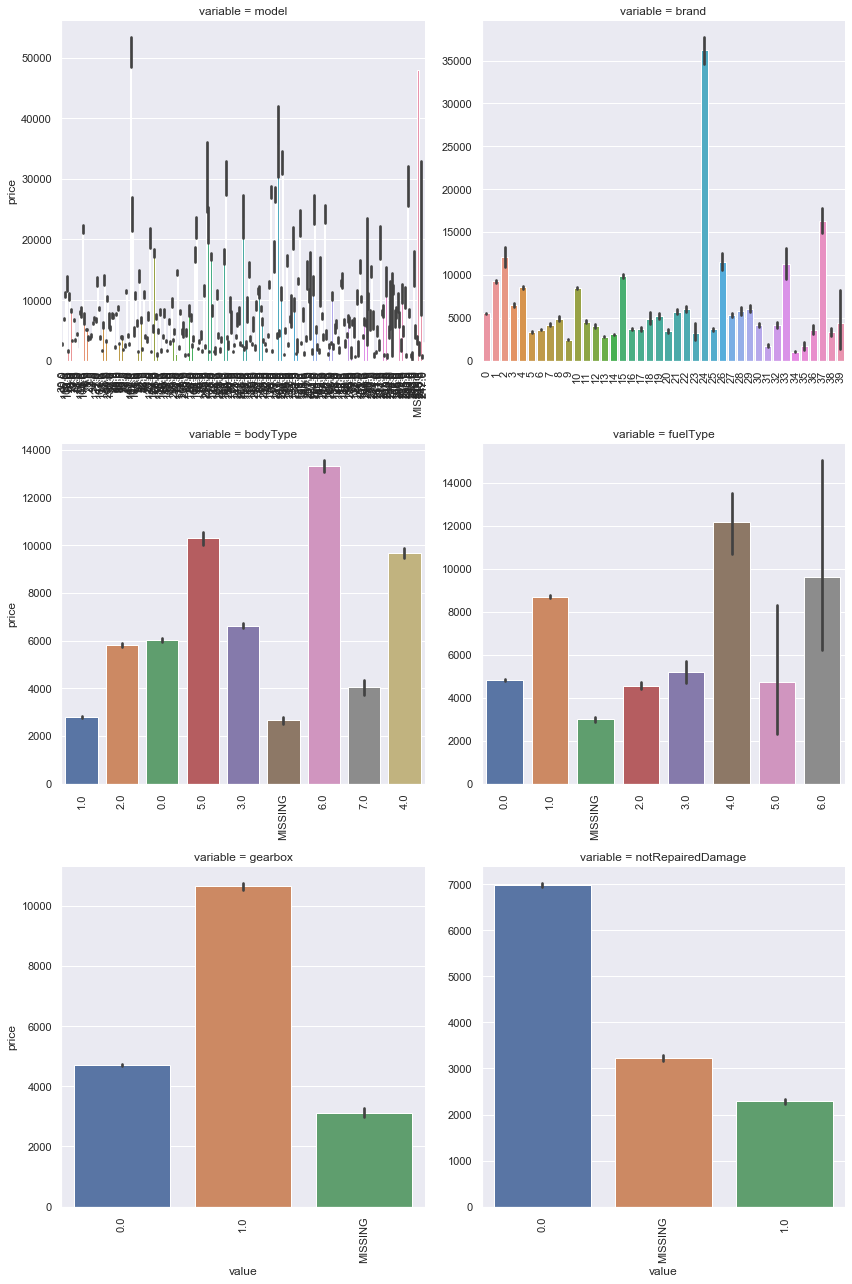

In [41]:
#类别特征柱形图可视化
categorical_features
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


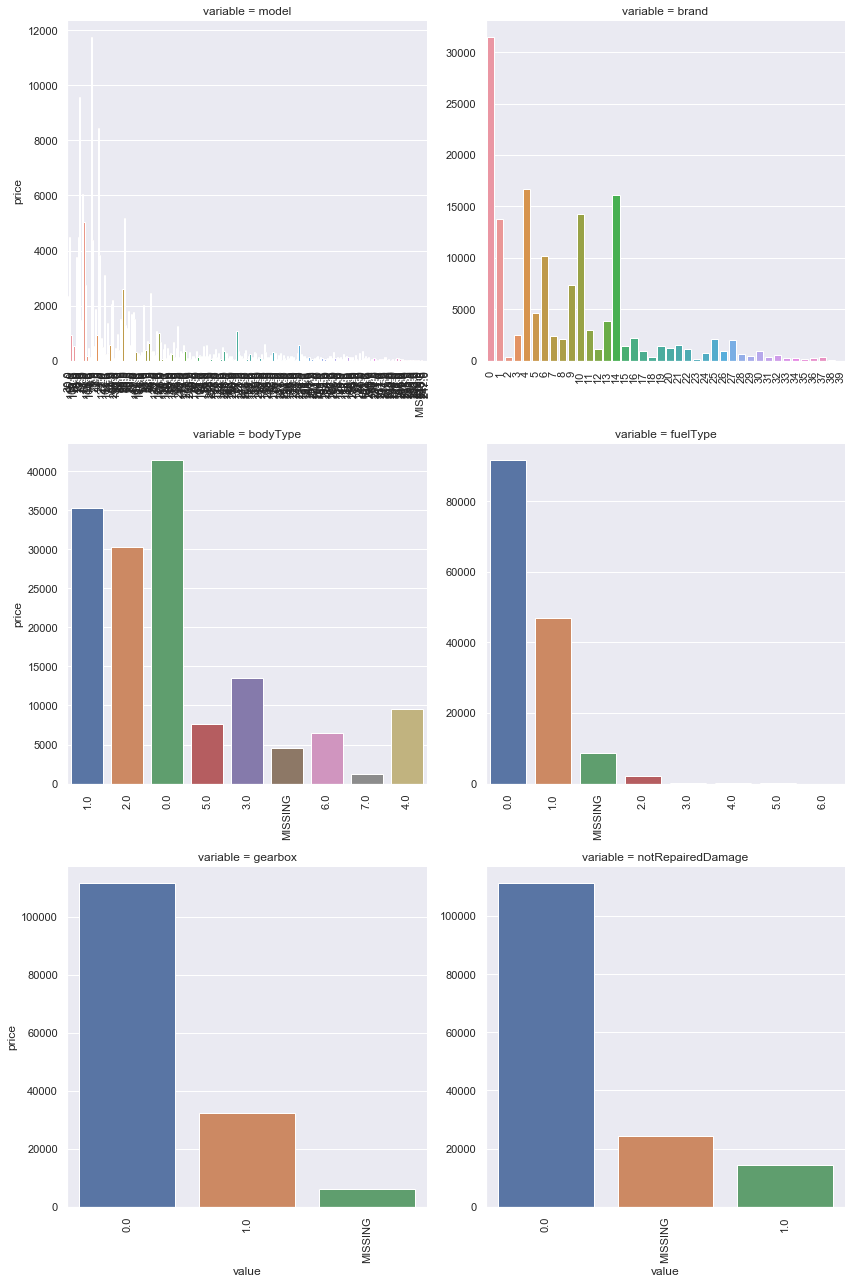

In [43]:
#类别特征的每个类别频数可视化
def count_plot(x,y,**kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
f=pd.melt(Train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=6)
g=g.map(count_plot,'value','price')

In [53]:
import pandas_profilling
pfr=pandas_profilling.ProfileReport(Train_data)
pfr.to.file('./abc.html')

ModuleNotFoundError: No module named 'pandas_profilling'